# Red Wine Quality Prediction


<img src='https://blog.eckraus.com/wp-content/uploads/2015/12/Row-Of-Red-Wines.png'>


# Problem Statement

#### From two datasets which include red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests

# Data Set Information:

#### The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

#### These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


# Attribute Information:

##### For more information, read [Cortez et al., 2009].
##### Input variables (based on physicochemical tests):
1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

In [1]:
# Import the libraries
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
import seaborn as sns #sets up styles and gives us more plotting options
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Load Datasets

In [2]:
# read data into a DataFrame
red_wine_dataset = pd.read_csv(r'datasets/winequality-red.csv', sep=';')
white_wine_dataset = pd.read_csv(r'datasets/winequality-white.csv', sep=';')
print(red_wine_dataset.columns)
print(white_wine_dataset.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [3]:
# Combining both datasets
wine_dataset = pd.concat([red_wine_dataset,white_wine_dataset])

In [4]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
print(red_wine_dataset.shape)
print(white_wine_dataset.shape)
print(wine_dataset.shape)

(1599, 12)
(4898, 12)
(6497, 12)


In [6]:
wine_dataset.reset_index(inplace=True)
wine_dataset = wine_dataset.drop(columns='index')

In [7]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
df = wine_dataset

In [9]:
#take the target variable in check the frequency
df['LOG_quality'] = np.log(df.quality+1) # Get Log Transformed MEDV

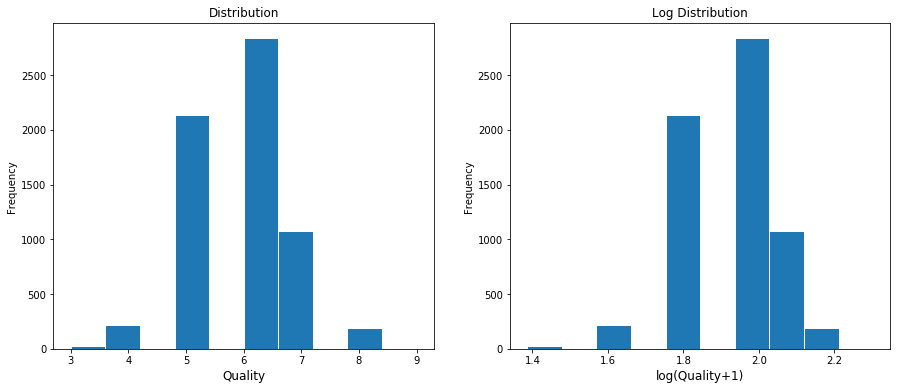

In [10]:
# plot the target variable and the log of target variable distribution
plt.subplot(1, 2, 1)
(df.quality).plot.hist(figsize=(15, 6), edgecolor = 'white')
plt.xlabel('Quality', fontsize=12)
plt.title('Distribution', fontsize=12)

#Plot Log Price Distribution
plt.subplot(1, 2, 2)
(df.LOG_quality).plot.hist(figsize=(15,6), edgecolor='white')
plt.xlabel('log(Quality+1)', fontsize=12)
plt.title('Log Distribution', fontsize=12)

plt.show()

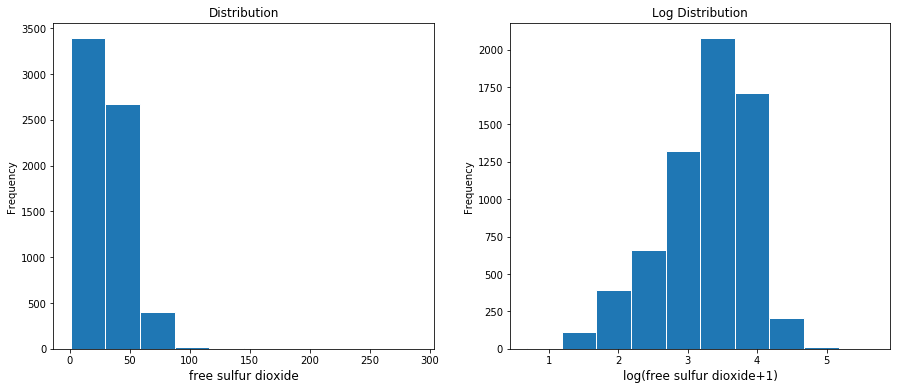

In [11]:
#take the target variable in check the frequency
df['LOG_free sulfur dioxide'] = np.log(df['free sulfur dioxide']+1) # Get Log Transformed MEDV
# plot the target variable and the log of target variable distribution
plt.subplot(1, 2, 1)
(df['free sulfur dioxide']).plot.hist(figsize=(15, 6), edgecolor = 'white')
plt.xlabel('free sulfur dioxide', fontsize=12)
plt.title('Distribution', fontsize=12)

#Plot Log Price Distribution
plt.subplot(1, 2, 2)
(df['LOG_free sulfur dioxide']).plot.hist(figsize=(15,6), edgecolor='white')
plt.xlabel('log(free sulfur dioxide+1)', fontsize=12)
plt.title('Log Distribution', fontsize=12)

plt.show()

In [12]:
# both has same distribution so will consider the target as quality score
Y = df.quality

### find the relationship between dependent and independent variables

In [13]:
df.corr()['quality'].sort_values(ascending = False)

quality                    1.000000
LOG_quality                0.994945
alcohol                    0.444319
LOG_free sulfur dioxide    0.112191
citric acid                0.085532
free sulfur dioxide        0.055463
sulphates                  0.038485
pH                         0.019506
residual sugar            -0.036980
total sulfur dioxide      -0.041385
fixed acidity             -0.076743
chlorides                 -0.200666
volatile acidity          -0.265699
density                   -0.305858
Name: quality, dtype: float64

In [14]:
X = df.drop(['quality','LOG_quality','LOG_free sulfur dioxide'],axis=1)
Y = df.quality

In [15]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [16]:
# initial linear regression of sklearn without feature engineering
from sklearn.linear_model import LinearRegression
# Initialize LR Model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Make predictions
predictions = lr.predict(X_test)

In [17]:
# Store results in variable
r2 = format(r2_score(y_test, predictions),'.3f')
rmse = format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f')
mae = format(mean_absolute_error(y_test, predictions),'.3f')

# Print out result
print("R Squared Score: ", format(r2_score(y_test, predictions),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test, predictions),'.3f'))

R Squared Score:  0.260
Root Mean Squared Error:  0.739
Mean Absolute Error:  0.566


### Adding the feature Red and White type of wine as a feature

In [18]:
red_wine_dataset = pd.read_csv(r'datasets/winequality-red.csv', sep=';')
white_wine_dataset = pd.read_csv(r'datasets/winequality-white.csv', sep=';')
print(red_wine_dataset.columns)
print(white_wine_dataset.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [19]:
red_wine_dataset['type'] = 'red'
white_wine_dataset['type'] = 'white'

In [20]:
wine_dataset_v1 = pd.concat([red_wine_dataset,white_wine_dataset])
wine_dataset_v1.reset_index(inplace=True)
wine_dataset_v1 = wine_dataset_v1.drop(columns='index')
df_v1 = wine_dataset_v1

In [21]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df_v1.type)
# Drop column B as it is now encoded
df_v1 = df_v1.drop('type',axis = 1)
# Join the encoded df
df_v1 = df_v1.join(one_hot)

In [22]:
X_v1 = df_v1.drop(['quality'],axis=1)
Y_v1 = df_v1.quality

In [23]:
# Split data into train/test sets
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(X_v1, Y_v1, test_size=0.20, random_state=42)

In [24]:
# initial linear regression of sklearn without feature engineering
from sklearn.linear_model import LinearRegression
# Initialize LR Model
lr = LinearRegression()

# Fit the model
lr.fit(X_train_v1, y_train_v1)

# Make predictions
predictions_v1 = lr.predict(X_test_v1)

In [25]:
# Store results in variable
r2_v1 = format(r2_score(y_test_v1, predictions_v1),'.3f')
rmse_v1 = format(np.sqrt(mean_squared_error(y_test_v1, predictions_v1)),'.3f')
mae_v1 = format(mean_absolute_error(y_test_v1, predictions_v1),'.3f')

# Print out result
print("R Squared Score: ", format(r2_score(y_test_v1, predictions_v1),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test_v1, predictions_v1)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test_v1, predictions_v1),'.3f'))

R Squared Score:  0.267
Root Mean Squared Error:  0.736
Mean Absolute Error:  0.564


### Quality distribution

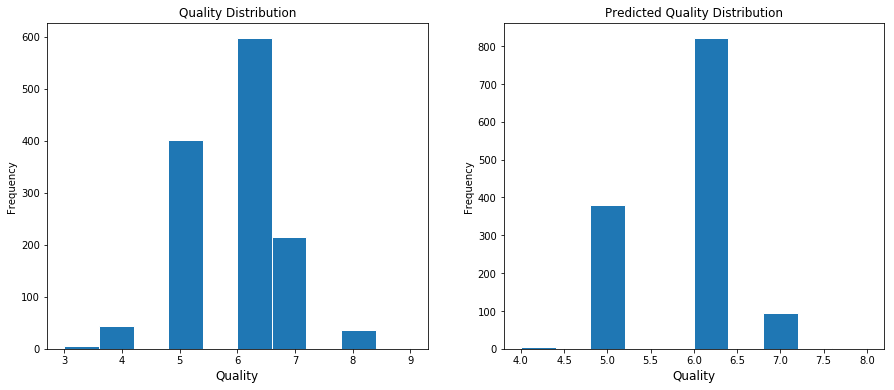

In [26]:
# Plot Quality Distribution
plt.subplot(1, 2, 1)
y_test_v1.plot.hist(figsize=(15, 6), edgecolor = 'white')
plt.xlabel('Quality', fontsize=12)
plt.title('Quality Distribution', fontsize=12)
#Plot Predicted Quality Distribution
plt.subplot(1, 2, 2)
pd.Series(np.round(predictions_v1)).plot.hist(figsize=(15,6), edgecolor='white')
plt.xlabel('Quality', fontsize=12)
plt.title('Predicted Quality Distribution', fontsize=12)


plt.show()

### Normalize the feature of the dataset

In [27]:
df_v1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red', 'white'],
      dtype='object')

In [28]:
from sklearn.preprocessing import StandardScaler
col= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','red','white']

# define a method to scale data, looping thru the columns, and passing a scaler
def scale_data(data, columns, scaler):
    for col in columns:
        data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))
    return data

# specify a scaler, and call the method on boston data
scaler = StandardScaler()
df_scaled = scale_data(df_v1, col, scaler)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,5,1.75019,-1.75019
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,5,1.75019,-1.75019
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,5,1.75019,-1.75019
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,6,1.75019,-1.75019
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,5,1.75019,-1.75019


In [30]:
X_v2 = df_scaled.drop(['quality'],axis=1)
Y_v2 = df_scaled.quality

In [31]:
# Split data into train/test sets
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, Y_v2, test_size=0.20, random_state=42)

In [32]:
# initial linear regression of sklearn without feature engineering
from sklearn.linear_model import LinearRegression
# Initialize LR Model
lr = LinearRegression()

# Fit the model
lr.fit(X_train_v2, y_train_v2)

# Make predictions
predictions_v2 = lr.predict(X_test_v2)

In [33]:
# Store results in variable
r2_v2 = format(r2_score(y_test_v2, predictions_v2))
rmse_v2 = format(np.sqrt(mean_squared_error(y_test_v2, predictions_v2)))
mae_v2 = format(mean_absolute_error(y_test_v2, predictions_v2),'.3f')

# Print out result
print("R Squared Score: ", format(r2_score(y_test_v2, predictions_v2),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test_v2, predictions_v2)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test_v2, predictions_v2),'.3f'))

R Squared Score:  0.267
Root Mean Squared Error:  0.736
Mean Absolute Error:  0.564


### Building different model for different type of wine

In [34]:
red_wine_dataset = pd.read_csv(r'datasets/winequality-red.csv', sep=';')
white_wine_dataset = pd.read_csv(r'datasets/winequality-white.csv', sep=';')
print(red_wine_dataset.columns)
print(white_wine_dataset.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [35]:
df_red_wine = red_wine_dataset

In [36]:
X_red_v1 = df_red_wine.drop(['quality'],axis=1)
Y_red_v1 = df_red_wine.quality

In [37]:
df_red_wine.corr()['quality'].drop('quality')

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

In [38]:
# Split data into train/test sets
X_train_red_v1, X_test_red_v1, y_train_red_v1, y_test_red_v1 = train_test_split(X_red_v1, Y_red_v1, test_size=0.20, random_state=42)

In [39]:
# initial linear regression of sklearn without feature engineering
from sklearn.linear_model import LinearRegression
# Initialize LR Model
lr = LinearRegression()

# Fit the model
lr.fit(X_train_red_v1, y_train_red_v1)

# Make predictions
predictions_red_v1 = lr.predict(X_test_red_v1)

In [40]:
print("R Squared Score: ", format(r2_score(y_test_red_v1, predictions_red_v1),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test_red_v1, predictions_red_v1)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test_red_v1, predictions_red_v1),'.3f'))

R Squared Score:  0.403
Root Mean Squared Error:  0.625
Mean Absolute Error:  0.504


In [41]:
lr.coef_

array([ 2.30853339e-02, -1.00130443e+00, -1.40821461e-01,  6.56431104e-03,
       -1.80650315e+00,  5.62733439e-03, -3.64444893e-03, -1.03515936e+01,
       -3.93687732e-01,  8.41171623e-01,  2.81889567e-01])

In [42]:
df_white_wine = white_wine_dataset
X_white_v1 = df_white_wine.drop(['quality'],axis=1)
Y_white_v1 = df_white_wine.quality

# Split data into train/test sets
X_train_white_v1, X_test_white_v1, y_train_white_v1, y_test_white_v1 = train_test_split(X_white_v1, Y_white_v1, test_size=0.20, random_state=42)

# initial linear regression of sklearn without feature engineering
from sklearn.linear_model import LinearRegression
# Initialize LR Model
lr_white = LinearRegression()

# Fit the model
lr_white.fit(X_train_white_v1, y_train_white_v1)

# Make predictions
predictions_white_v1 = lr_white.predict(X_test_white_v1)

print("R Squared Score: ", format(r2_score(y_test_white_v1, predictions_white_v1),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test_white_v1, predictions_white_v1)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test_white_v1, predictions_white_v1),'.3f'))

R Squared Score:  0.265
Root Mean Squared Error:  0.754
Mean Absolute Error:  0.586


In [43]:
lr_white.coef_

array([ 4.59072370e-02, -1.91488432e+00, -6.13034698e-02,  7.12395507e-02,
       -2.64751329e-02,  5.11945372e-03, -2.42153962e-04, -1.24264125e+02,
        6.00699854e-01,  6.49072780e-01,  2.29008684e-01])

### Check the features and the handle the outliers if any

In [44]:
red_wine_dataset = pd.read_csv(r'datasets/winequality-red.csv', sep=';')
white_wine_dataset = pd.read_csv(r'datasets/winequality-white.csv', sep=';')
print(red_wine_dataset.columns)
print(white_wine_dataset.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [45]:
red_wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [46]:
white_wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


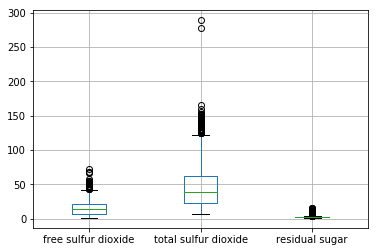

In [47]:
# plot box plot to display the outliers
red_wine_dataset.boxplot(column =['free sulfur dioxide','total sulfur dioxide','residual sugar'])

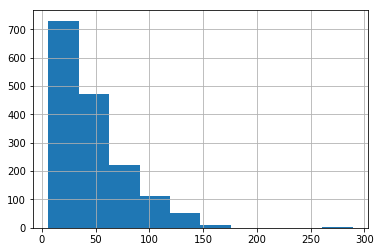

In [48]:
red_wine_dataset['total sulfur dioxide'].hist()

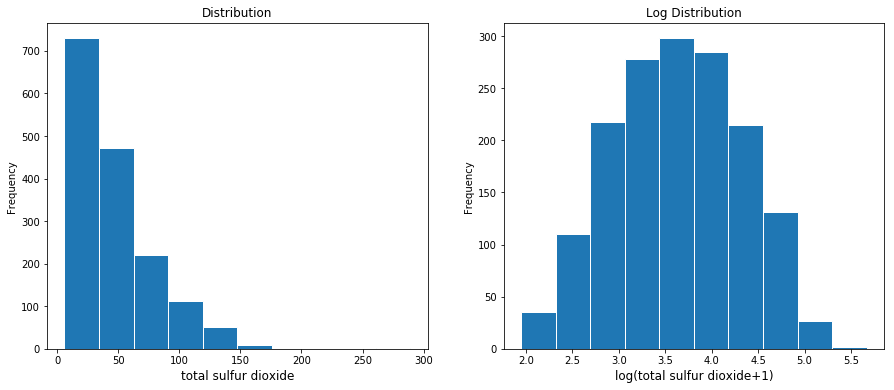

In [49]:
# take the target variable in check the frequency
red_wine_dataset['LOG_total sulfur dioxide'] = np.log(red_wine_dataset['total sulfur dioxide']+1) # Get Log Transformed MEDV
# plot the target variable and the log of target variable distribution
plt.subplot(1, 2, 1)
(red_wine_dataset['total sulfur dioxide']).plot.hist(figsize=(15, 6), edgecolor = 'white')
plt.xlabel('total sulfur dioxide', fontsize=12)
plt.title('Distribution', fontsize=12)

#Plot Log Price Distribution
plt.subplot(1, 2, 2)
(red_wine_dataset['LOG_total sulfur dioxide']).plot.hist(figsize=(15,6), edgecolor='white')
plt.xlabel('log(total sulfur dioxide+1)', fontsize=12)
plt.title('Log Distribution', fontsize=12)

plt.show()

In [50]:
red_wine_dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,LOG_total sulfur dioxide
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,-0.118225
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,0.073671
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,-0.002553
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.149188
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,0.060205
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,0.714297
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,0.927345
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,0.104534
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.016021
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.068751


In [51]:
red_wine_dataset_v1 = red_wine_dataset.drop(['fixed acidity', 'density', 'citric acid', \
                                          'free sulfur dioxide', 'total sulfur dioxide'], axis=1)

In [52]:
X_red_v2 = red_wine_dataset_v1.drop(['quality'], axis=1)
Y_red_v2 = red_wine_dataset_v1['quality']
# Split data into train/test sets
X_train_red_v2, X_test_red_v2, y_train_red_v2, y_test_red_v2 = train_test_split(X_red_v2, Y_red_v2, test_size=0.20, random_state=42)

In [53]:
# initial linear regression of sklearn without feature engineering
from sklearn.linear_model import LinearRegression
# Initialize LR Model
lr = LinearRegression()

# Fit the model
lr.fit(X_train_red_v2, y_train_red_v2)

# Make predictions
predictions_red_v2 = lr.predict(X_test_red_v2)

In [54]:
print("R Squared Score: ", format(r2_score(y_test_red_v2, predictions_red_v2),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test_red_v2, predictions_red_v2)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test_red_v2, predictions_red_v2),'.3f'))

R Squared Score:  0.402
Root Mean Squared Error:  0.625
Mean Absolute Error:  0.507


### OLS method for calculating the cofficients

In [55]:
import statsmodels.api as sm

# Define X Values
X = sm.add_constant(red_wine_dataset_v1)

# Define Y 
Y = red_wine_dataset_v1.quality

# Apply OLS to our X and Y
lm = sm.OLS(Y, X).fit()

# Print Summary of Outputs
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.747e+31
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        05:50:56   Log-Likelihood:                 52437.
No. Observations:                1599   AIC:                        -1.049e+05
Df Residuals:                    1590   BIC:                        -1.048e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     5.551e-16   9.09e-16      0.610      0.542   -1.23e-15    2.34e-15
volatile acidity          7.772e-16   2.22e-16      3.497      0.000    3.41e-16    1.21e-15
residual sugar            5.551e-17   2.52e-17      2.201      0.028    6.04e-18    1.05e-16
chlorides                 3.553e-15    8.6e-16      4.129      0.000    1.87e-15    5.24e-15
pH                        8.327e-16   2.51e-16      3.321      0.001    3.41e-16    1.32e-15
sulphates                -4.996e-16   2.42e-16     -2.068      0.039   -9.73e-16   -2.58e-17
alcohol                  -8.327e-16   3.98e-17    -20.934      0.000   -9.11e-16   -7.55e-16
quality                      1.0000   5.35e-17   1.87e+16      0.000       1.000       1.000
LOG_total sulfur dioxide  2.776e-17   5.37e-17      0.517      0.605   -7.76e-17    1.33e-16
==============================================================================
Omnibus:                       63.473   Durbin-Watson:                   0.578
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.363
Skew:                           0.433   Prob(JB):                     1.59e-17
Kurtosis:                       3.641   Cond. No.                         387.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""